# 2023 환경 데이터분석 공모전

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False # 한글 깨짐 방지
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
path = 'C:/datasets'
os.chdir(path)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'C:/datasets'

In [6]:
df = pd.read_csv("life_all.csv")

In [7]:
# 행/열 전환
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8


In [8]:
# 열 이름 변경
df.columns = df.iloc[0, :]

# 필요없는 행 지우기
df.drop(labels='구분', axis=0, inplace=True)

# '년' 빼버리기
df.idx = list(df.index)
year = []
for i in df.idx:
    year.append(i[0:4])

# datetime을 index로 변경!
year = pd.to_datetime(year)
df.index = year
df.tail()

구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2017-01-01,162.7,1129.9,331.2,271.0,119.8,285.7,144.4,389.5,797.2,23.3,96.4,139.3,189.9,213.7,62.7,230.2,173.1
2018-01-01,196.3,1301.5,335.0,318.6,135.3,301.1,164.5,340.3,741.7,37.9,100.4,177.5,201.1,252.8,47.4,286.4,176.3
2019-01-01,264.7,1572.0,409.1,320.6,129.6,349.7,202.3,508.3,1111.1,33.2,128.8,254.6,231.8,217.4,81.6,246.9,243.6
2020-01-01,104507.8,674379.0,160810.0,146123.6,51582.7,132795.4,84849.5,288889.6,593849.8,16540.3,59688.1,115752.4,97958.0,82541.3,46426.4,110946.0,97861.1
2021-01-01,114571.8,789086.5,181060.0,147046.8,73882.0,108613.4,75176.4,195057.2,558579.8,23216.2,45469.6,147726.8,85923.3,86318.3,48265.3,127683.7,102501.2


In [9]:
# 2020 ~ 2021 오류 수정 → 365로 나눠주기
p_2020 = np.array(df.loc['2020-01-01', :])
p_2020 = list(p_2020 / 365)
df.loc['2020-01-01', :] = np.round(p_2020, 1)

p_2021 = np.array(df.loc['2021-01-01', :])
p_2021 = list(p_2021 / 365)
df.loc['2021-01-01', :] = np.round(p_2021, 1)

In [10]:
# 잘 됐나 확인!
df.tail()

구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2017-01-01,162.7,1129.9,331.2,271.0,119.8,285.7,144.4,389.5,797.2,23.3,96.4,139.3,189.9,213.7,62.7,230.2,173.1
2018-01-01,196.3,1301.5,335.0,318.6,135.3,301.1,164.5,340.3,741.7,37.9,100.4,177.5,201.1,252.8,47.4,286.4,176.3
2019-01-01,264.7,1572.0,409.1,320.6,129.6,349.7,202.3,508.3,1111.1,33.2,128.8,254.6,231.8,217.4,81.6,246.9,243.6
2020-01-01,286.3,1847.6,440.6,400.3,141.3,363.8,232.5,791.5,1627.0,45.3,163.5,317.1,268.4,226.1,127.2,304.0,268.1
2021-01-01,313.9,2161.9,496.1,402.9,202.4,297.6,206.0,534.4,1530.4,63.6,124.6,404.7,235.4,236.5,132.2,349.8,280.8


---

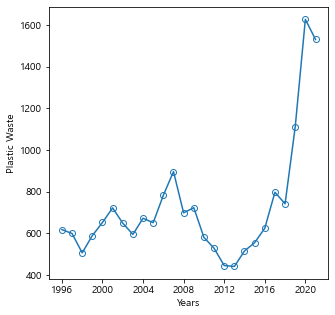

In [11]:
# plot(서울)

fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.plot(df['서울'], marker='o', markerfacecolor='none')

plt.ylabel('Plastic Waste')
plt.xlabel('Years')
plt.show()

확실히 **2020년 전후**로 눈에 띄게 증가했음

---

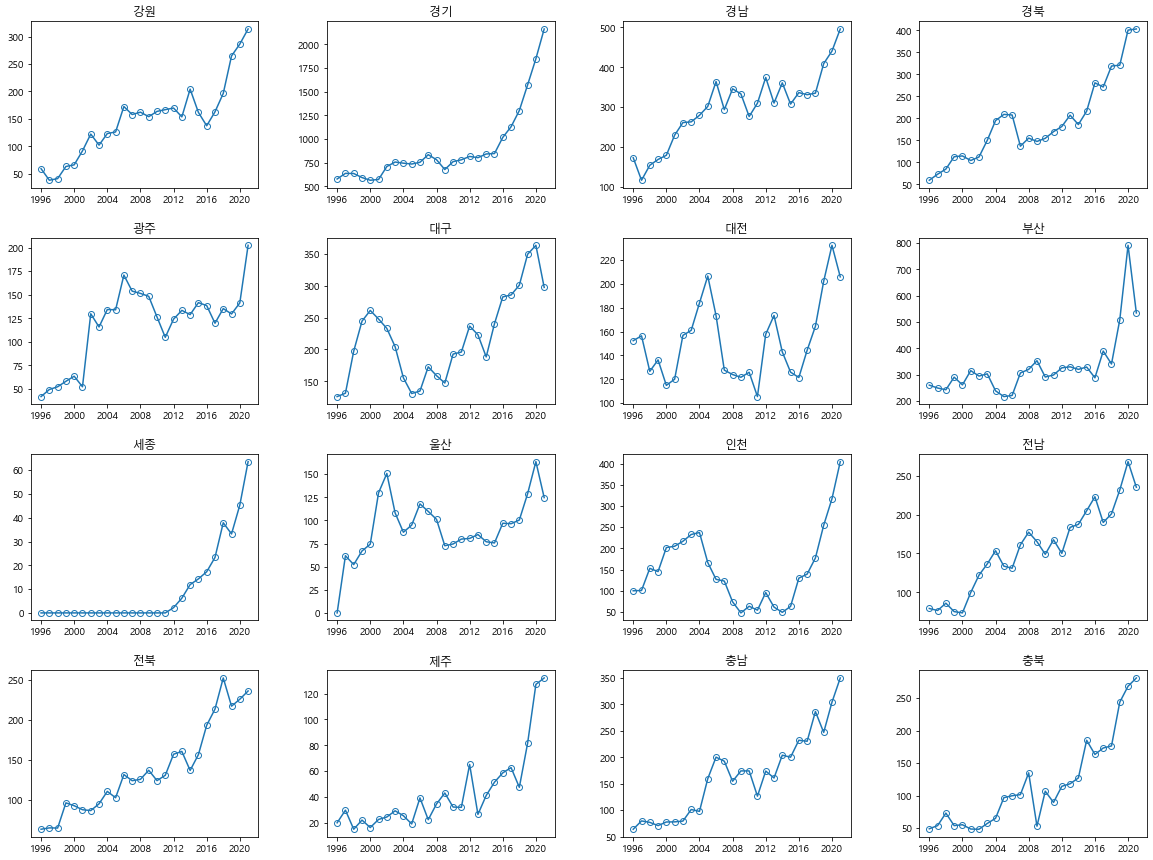

In [12]:
# 서울 이외의 지역들 다른 데이터로 만들기
df_local = df.drop(columns=['서울'], axis=1)

# plot(서울 외)
f, axes = plt.subplots(4, 4)
f.set_size_inches((20, 15)) # 격자 크기 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) # 격자 여백 설정

for i in range(4):
    for j in range(4):
        axes[i, j].set_title("%s" %df_local.columns[4*i+j])
        axes[i, j].plot(df_local.iloc[:, 4*i+j], marker='o', markerfacecolor='none')

---

## Simple Linear Regression with Time Series

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [14]:
# create a time dummy
df['date'] = np.arange(len(df.index))
df.head()

구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,date
1996-01-01,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9,0
1997-01-01,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8,1
1998-01-01,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0,2
1999-01-01,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8,3
2000-01-01,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,0.0,74.3,201.9,73.3,92.5,16.2,77.7,55.1,4


---

### 들어가기 전에

TimeSeries_Train_Test split 개념 설명

https://ok-lab.tistory.com/192

---

※ 세종은 결측값이 너무 많아서 제거했습니다!

→ 개념을 하나하나 설명하기에는 비효율적이라고 생각해서 개념 및 구현과 관련된 링크 걸어놨으니까 꼭! 한번씩 봐주세요!

---

In [15]:
# 세종 bye
df.drop(columns='세종', axis=1, inplace=True)
df.head()

구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북,date
1996-01-01,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9,0
1997-01-01,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8,1
1998-01-01,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0,2
1999-01-01,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8,3
2000-01-01,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1,4


---

### Train_Test_Split

1) Rolling(Nested Cross-Validation)

<img src="https://blog.kakaocdn.net/dn/bBFJ96/btrC4ivMtfi/wciJtaQPMiJh9pY4seuWk1/img.png" width="450" height="450" align="left"/>

In [13]:
def rolling_rmse_r2(dat, n): # dat ← dataframe, n ← 몇 번의 반복으로 CV를 할 건가?
    for i in range(0, len(df.columns)-1):
        X = dat.loc[:, ['date']]
        y = dat.loc[:, dat.columns[i]]
    
        tscv = TimeSeriesSplit(n_splits = n)
        rmse = []
        R2 = []
        MAPE = []

        for train_index, test_index in tscv.split(dat):
            model = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
            pred = model.predict(X.iloc[test_index])
            real = y.iloc[test_index]
    
            SSR = np.sum((pred - np.mean(real))**2) 
            SSE = np.sum((real - pred)**2)
            SST = SSE + SSR
    
            MSE = np.mean(SSE)
            rmse.append(np.sqrt(MSE)) # rmse.append(np.sqrt(mean_squared_error(real, pred)))
    
            r2 = SSR / SST # r2_score() : 자꾸 nan떠서 그냥 수식으로 직접 구했습니다
            R2.append(r2)
            
            mape = np.mean(np.abs((real - pred) / real)) * 100
            MAPE.append(mape)
        
        print("%s 지역의 RMSE : %.2f, R2 : %.2f, MAPE : %.2f" %(dat.columns[i], np.mean(rmse), np.mean(R2), np.mean(MAPE)))

In [14]:
rolling_rmse_r2(df, 25)

강원 지역의 RMSE : 28.89, R2 : 0.50, MAPE : 22.25
경기 지역의 RMSE : 148.92, R2 : 0.50, MAPE : 12.16
경남 지역의 RMSE : 44.50, R2 : 0.50, MAPE : 17.04
경북 지역의 RMSE : 36.73, R2 : 0.50, MAPE : 18.70
광주 지역의 RMSE : 27.00, R2 : 0.50, MAPE : 21.80
대구 지역의 RMSE : 51.84, R2 : 0.50, MAPE : 24.46
대전 지역의 RMSE : 31.01, R2 : 0.50, MAPE : 20.18
부산 지역의 RMSE : 54.49, R2 : 0.50, MAPE : 13.83
서울 지역의 RMSE : 180.70, R2 : 0.50, MAPE : 22.18
울산 지역의 RMSE : 33.28, R2 : 0.50, MAPE : 39.55
인천 지역의 RMSE : 71.84, R2 : 0.50, MAPE : 55.80
전남 지역의 RMSE : 16.70, R2 : 0.50, MAPE : 11.38
전북 지역의 RMSE : 14.68, R2 : 0.50, MAPE : 9.99
제주 지역의 RMSE : 14.33, R2 : 0.50, MAPE : 32.55
충남 지역의 RMSE : 25.70, R2 : 0.50, MAPE : 15.27
충북 지역의 RMSE : 27.37, R2 : 0.50, MAPE : 23.93


---

2) Blocking(Walk-Forward) + Random Forest

<img src="https://i.stack.imgur.com/jKVo4.png" width="600" height="600" align="left"/>

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [44]:
# 이거는 패키지가 없어서 제가 거의 다 만들었습니당,, 이해 안 가는 부분 있으면 말해주세여
def blocking_rmse_r2(dat, n): # dat ← dataframe, n = n_splits(분할 횟수)
    X = dat.loc[:, ['date']]
    for i in range(0, len(df.columns)-1):
        y = df.iloc[:, i]
        y = y.astype('int')
        # 공식 및 데이터 특성상 n의 값은 2~13까지만 가능합니다!
        
        k_fold_size = len(X) // n # 움직이는 보폭? 이라고 생각하시면 편함

        R2 = []
        rmse = []
        MAPE = []

        margin = 0
        for j in range(1, n):
            start = j * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            X_train, X_test = X.iloc[start:mid], X.iloc[mid + margin : stop]
            y_train, y_test = y.iloc[start:mid], y.iloc[mid + margin : stop]
            
            # n_estimators 넣기
            model = RandomForestClassifier(n_estimators=5, random_state=42)
            model.fit(X_train, y_train)

            pred = model.predict(X_test)

            SSR = np.sum((pred - np.array(np.mean(y_test)))**2) 
            SSE = np.sum((y_test - pred)**2)
            SST = SSE + SSR

            MSE = np.mean(SSE)
            rmse.append(np.sqrt(MSE))

            mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
            MAPE.append(mape)

            r2 = SSR / SST
            R2.append(r2)

        print("%s 지역의 RMSE : %.2f, R2 : %.2f, MAPE : %.2f" %(dat.columns[i], np.mean(rmse), np.mean(R2), np.mean(MAPE)))

In [53]:
blocking_rmse_r2(df, 13) # n : 2~13 바꿔가면서 넣으시면 됩니다

강원 지역의 RMSE : 23.08, R2 : 0.50, MAPE : 15.85
경기 지역의 RMSE : 85.42, R2 : 0.50, MAPE : 7.27
경남 지역의 RMSE : 38.08, R2 : 0.50, MAPE : 12.15
경북 지역의 RMSE : 21.08, R2 : 0.50, MAPE : 13.72
광주 지역의 RMSE : 15.08, R2 : nan, MAPE : 12.06
대구 지역의 RMSE : 29.17, R2 : 0.50, MAPE : 12.88
대전 지역의 RMSE : 19.33, R2 : 0.50, MAPE : 12.84
부산 지역의 RMSE : 66.67, R2 : 0.50, MAPE : 16.53
서울 지역의 RMSE : 91.92, R2 : 0.50, MAPE : 10.97
울산 지역의 RMSE : 19.33, R2 : nan, MAPE : 18.63
인천 지역의 RMSE : 30.00, R2 : 0.50, MAPE : 22.46
전남 지역의 RMSE : 23.33, R2 : 0.50, MAPE : 14.56
전북 지역의 RMSE : 13.92, R2 : 0.50, MAPE : 9.98
제주 지역의 RMSE : 12.00, R2 : 0.50, MAPE : 36.31
충남 지역의 RMSE : 22.50, R2 : nan, MAPE : 13.68
충북 지역의 RMSE : 26.58, R2 : 0.50, MAPE : 29.30


전반적으로 blocking이 더 좋은 거 같음!